In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [10]:
marketing = pd.read_csv(r"C:\Users\HARSHITA MEHRA\OneDrive\Desktop\bank.csv")


In [11]:
print(marketing)

       age  marital  education  default  balance  housing  loan  duration  \
0       59  married  secondary        0     2343        1     0      1042   
1       56  married  secondary        0       45        0     0      1467   
2       41  married  secondary        0     1270        1     0      1389   
3       55  married  secondary        0     2476        1     0       579   
4       54  married   tertiary        0      184        0     0       673   
...    ...      ...        ...      ...      ...      ...   ...       ...   
11157   33   single    primary        0        1        1     0       257   
11158   39  married  secondary        0      733        0     0        83   
11159   32   single  secondary        0       29        0     0       156   
11160   43  married  secondary        0        0        0     1         9   
11161   34  married  secondary        0        0        0     0       628   

       campaign  pdays  previous  deposit  
0             1     -1         

In [12]:
marketing.describe()

,age,default,balance,housing,loan,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,0.015051,1528.538524,0.473123,0.130801,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,0.121761,3225.413326,0.499299,0.337198,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,0.000000,-6847.000000,0.000000,0.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,122.000000,0.000000,0.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,550.000000,0.000000,0.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1708.000000,1.000000,0.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,1.000000,81204.000000,1.000000,1.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [13]:
newdata = pd.get_dummies(marketing, columns=['marital'])
print(newdata.head())

   age  education  default  balance  housing  loan  duration  campaign  pdays  \
0   59  secondary        0     2343        1     0      1042         1     -1   
1   56  secondary        0       45        0     0      1467         1     -1   
2   41  secondary        0     1270        1     0      1389         1     -1   
3   55  secondary        0     2476        1     0       579         1     -1   
4   54   tertiary        0      184        0     0       673         2     -1   

   previous  deposit  marital_divorced  marital_married  marital_single  
0         0        1                 0                1               0  
1         0        1                 0                1               0  
2         0        1                 0                1               0  
3         0        1                 0                1               0  
4         0        1                 0                1               0  


In [14]:
newdata = pd.get_dummies(marketing, columns=['education'])
print(newdata.head())

   age  marital  default  balance  housing  loan  duration  campaign  pdays  \
0   59  married        0     2343        1     0      1042         1     -1   
1   56  married        0       45        0     0      1467         1     -1   
2   41  married        0     1270        1     0      1389         1     -1   
3   55  married        0     2476        1     0       579         1     -1   
4   54  married        0      184        0     0       673         2     -1   

   previous  deposit  education_primary  education_secondary  \
0         0        1                  0                    1   
1         0        1                  0                    1   
2         0        1                  0                    1   
3         0        1                  0                    1   
4         0        1                  0                    0   

   education_tertiary  education_unk0wn  
0                   0                 0  
1                   0                 0  
2             

C:\Users\HARSHITA MEHRA\AppData\Local\Temp\ipykernel_13276\473866963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(newdata.corr(), annot = True, cmap = 'OrRd')


<Axes: >

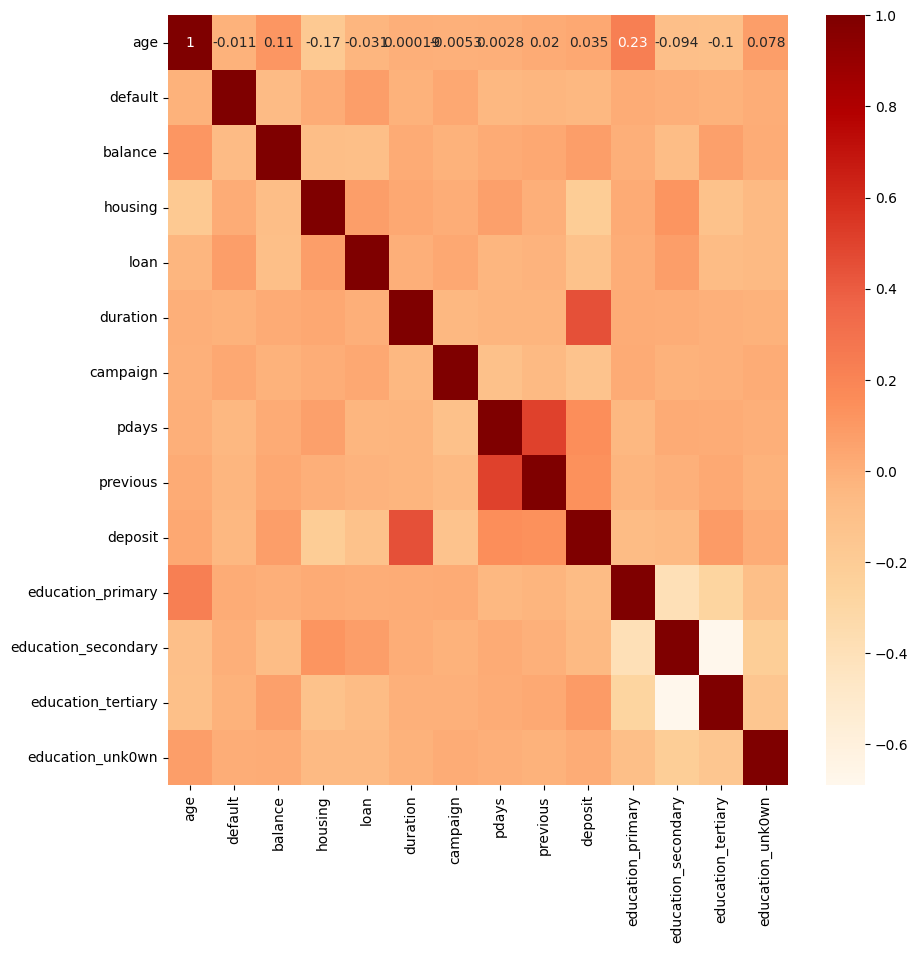

In [15]:
plt.figure(figsize = (10,10))
sns.heatmap(newdata.corr(), annot = True, cmap = 'OrRd')

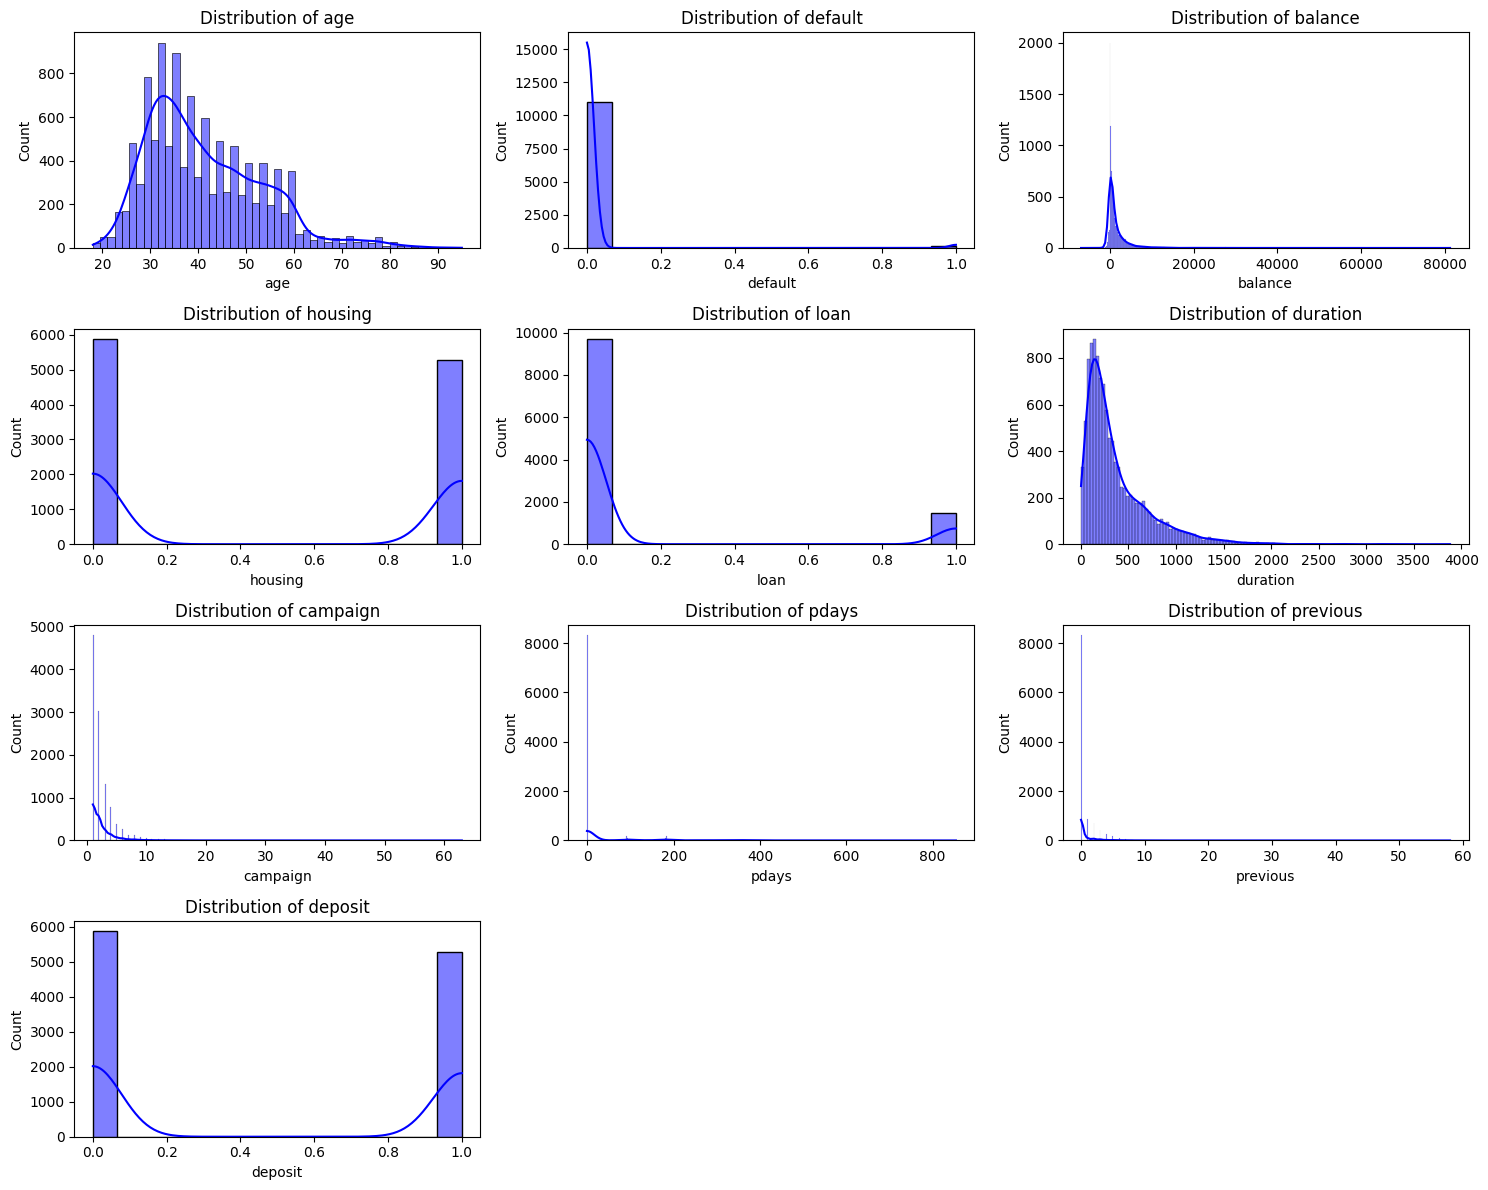

In [17]:
num_cols = newdata.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.histplot(newdata[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

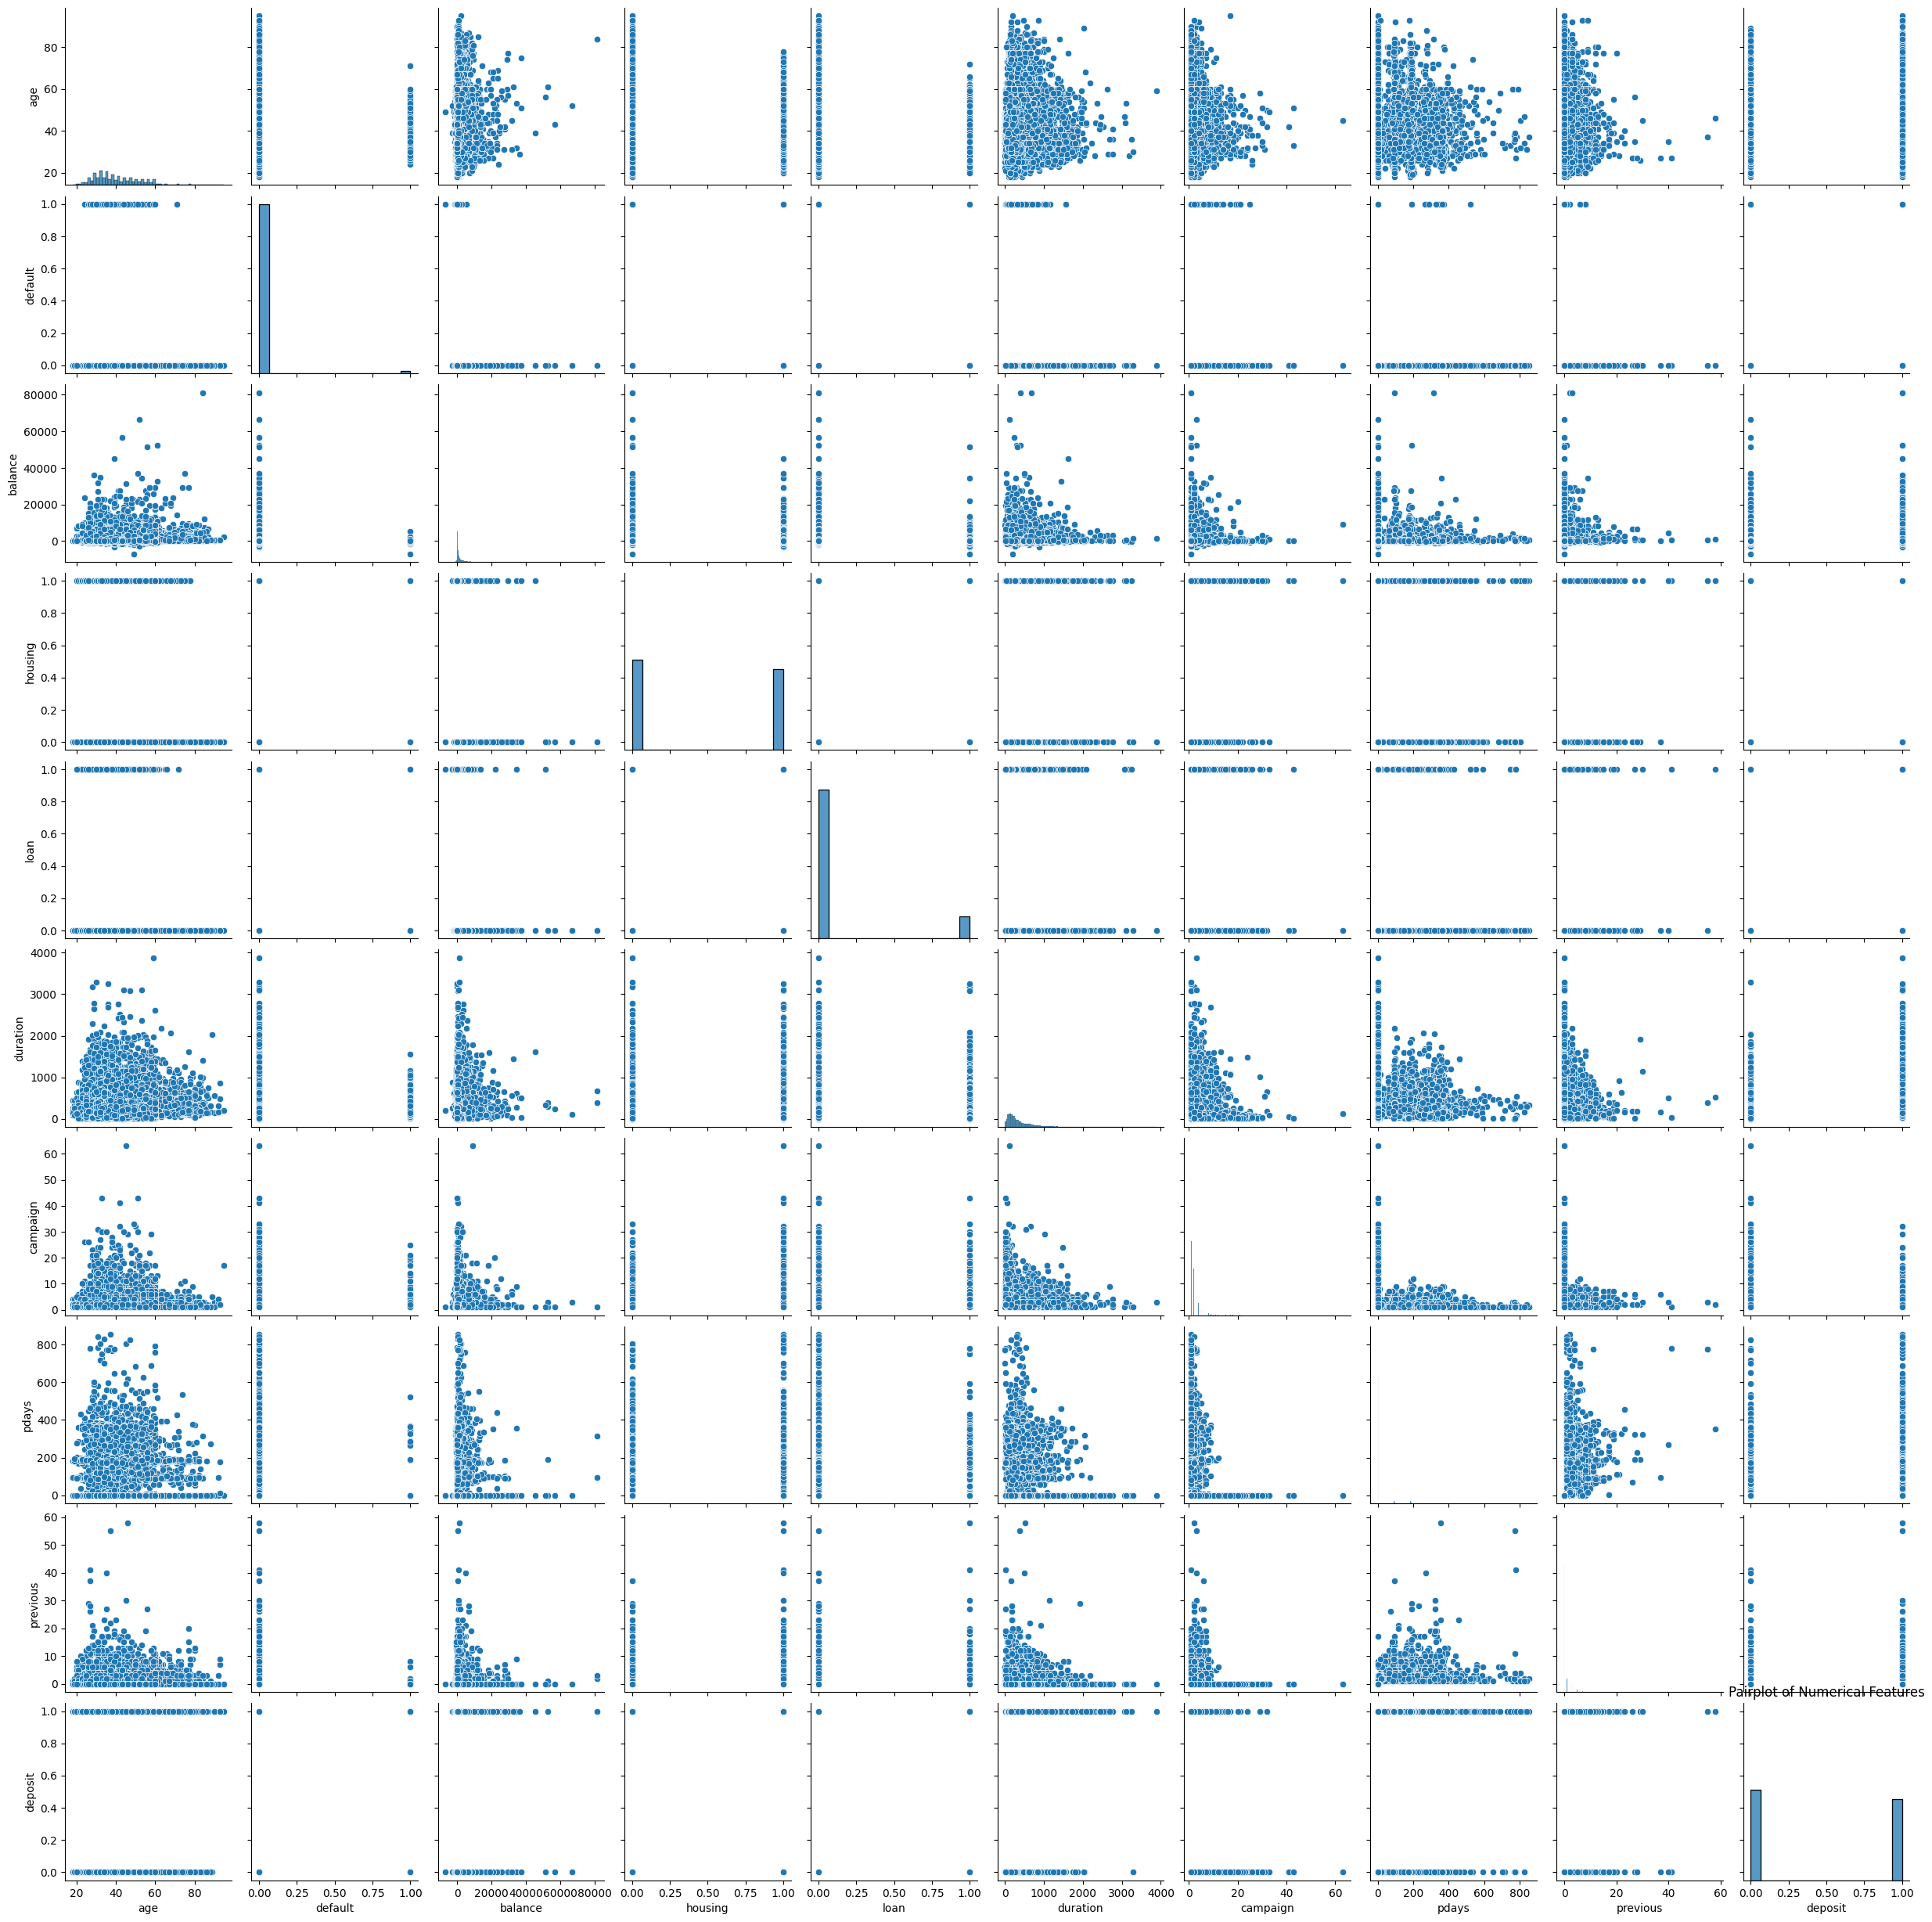

In [18]:
sns.pairplot(newdata[num_cols])
plt.title('Pairplot of Numerical Features')
plt.show()

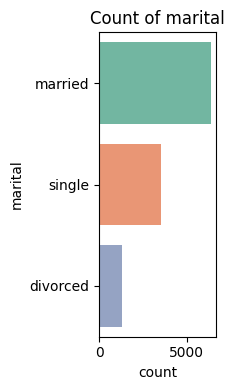

In [30]:
cat_cols = newdata.select_dtypes(include=['object']).columns

plt.figure(figsize=(5,4))
for i, col in enumerate(cat_cols):
    plt.subplot(len(cat_cols)//3 + 1, 3, i+1)
    sns.countplot(y=newdata[col], palette='Set2')
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

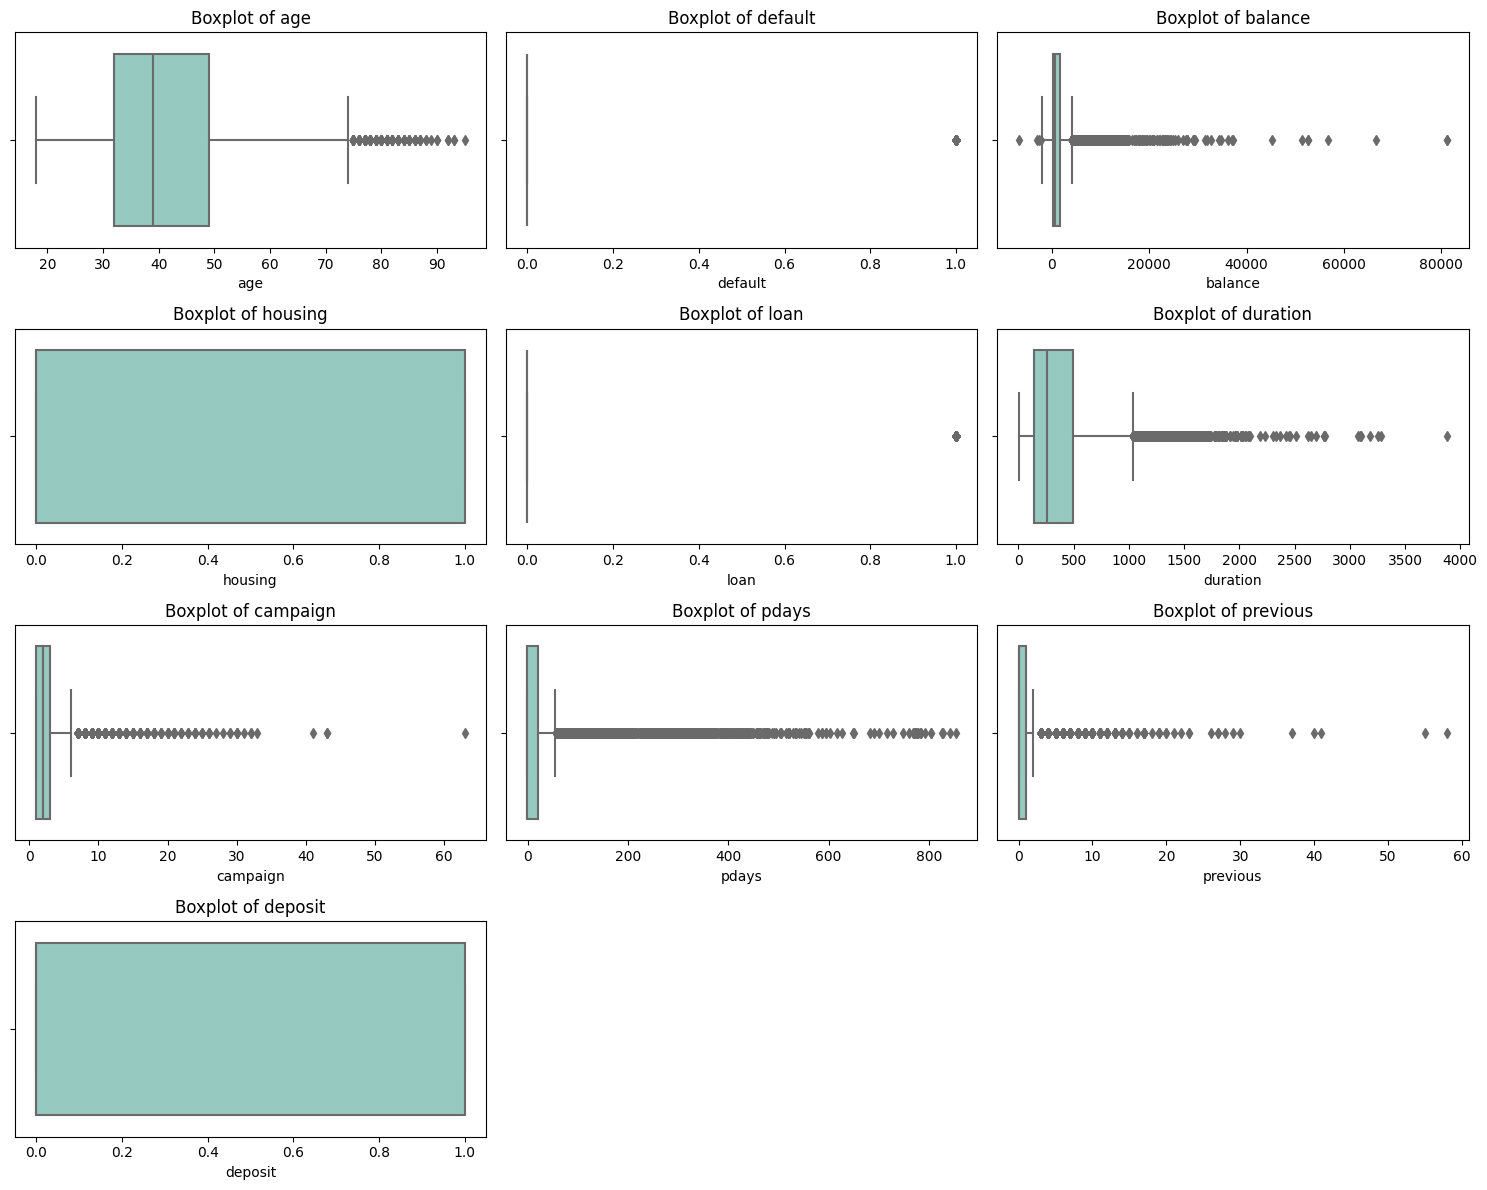

In [20]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols)//3 + 1, 3, i+1)
    sns.boxplot(x=newdata[col], palette='Set3')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

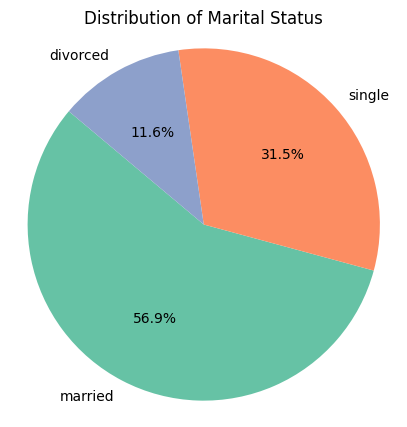

In [31]:
import matplotlib.pyplot as plt
marital_status_counts = marketing['marital'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Marital Status')
plt.axis('equal')  
plt.show()



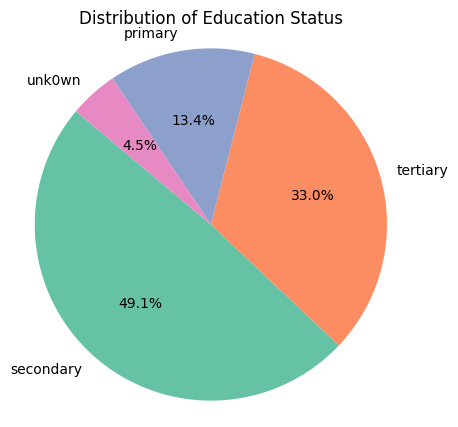

In [32]:
marital_status_counts = marketing['education'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Distribution of Education Status')
plt.axis('equal')  
plt.show()


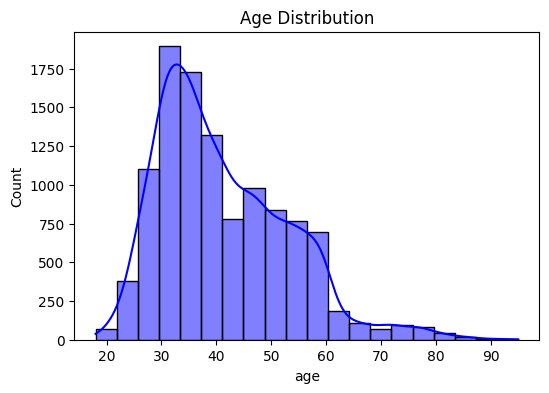

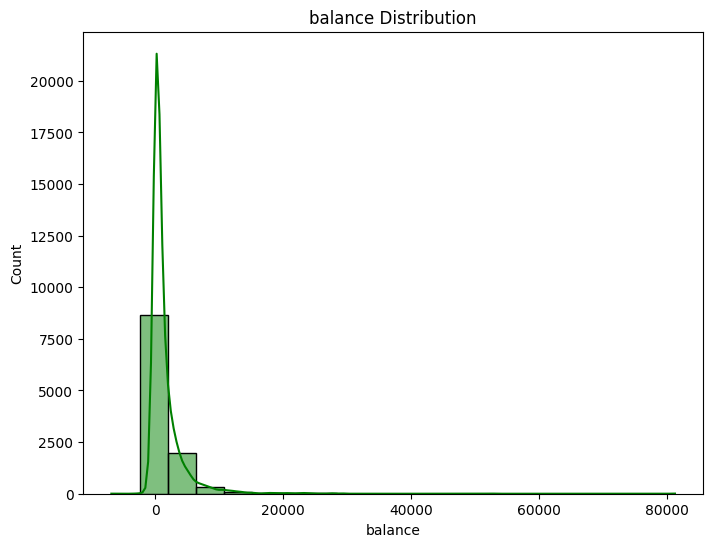

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(newdata['age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

# Histogram of Income
plt.figure(figsize=(8, 6))
sns.histplot(newdata['balance'], bins=20, kde=True, color='green')
plt.title('balance Distribution')
plt.show()